In [1]:
import glob
import pdftotext
from datetime import datetime
import spacy
import re
import nltk
import sys
from tqdm import tqdm 
from time import sleep 
import textacy

sys.path.append("/media/gabriel/Data/Projects/cev/noun-phrases/")
from src.util.common import Common

In [2]:
path = "/media/gabriel/Data/temp/scraping-master/sentencias_JyP/ext_data/output/sentencias/"

In [3]:

list_files = glob.glob(path+"*.pdf")
print(list_files[1:2])


['/media/gabriel/Data/temp/scraping-master/sentencias_JyP/ext_data/output/sentencias/Aramis Machado Ortiz_29-jun-11.pdf']


In [4]:
import calendar
print(list(calendar.month_abbr))

['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [61]:
# Load 
count = 0 
list_texts_corpus = []
for i in tqdm(range(0, len(list_files)), desc ="Read Corpus"):  
    single_file = list_files[i]
    error_flag = False
    count += 1
    name = single_file.replace(path, '').split("_")
    date_time_str = name[1].replace('.pdf', '').replace('dic', 'dec').replace('agt','aug').replace('abr', 'apr').replace('ago', 'aug').replace('ene', 'jan').replace('2014', '14')
    try:
        date_time_obj = datetime.strptime(date_time_str, '%d-%b-%y')
    except:
        error_flag = True
        print(single_file)
        print("Error casting data.")
 
    file_name = name[0].replace(path, '')
    file_name = file_name.replace(date_time_str, '')
    file_name = file_name.replace('.pdf', '')
    
    with open(single_file, "rb") as f:
            pdf = pdftotext.PDF(f)
    if count % 4 == 0:
        break
    sigle_dict = {'path': single_file, 'file_name': file_name, 'date': date_time_obj, 'year': date_time_obj.year, 'month': date_time_obj.month, 'day': date_time_obj.day, 'num_pages': len(pdf), 'pages_raw': list(pdf),  
                  'text_raw': "\n\n".join(pdf), 'sentences': [], 'doc_parser': []}
#     print('\t -> ', count, date_time_str, 'file_name', sigle_dict['file_name'], 'date', sigle_dict['date'], 'num_pages', sigle_dict['num_pages'])
    list_texts_corpus.append(sigle_dict)

Read Corpus:   4%|▍         | 3/79 [00:04<01:47,  1.42s/it]


In [6]:
count = 0
for item in list_texts_corpus:
    count += 1
    print('-> ', count, '\tfile_name:', item['file_name'][:50].zfill(50).replace('0', ' '), '\tdate:', item['date'], '\tnum_pages:', item['num_pages'])

->  1 	file_name:                              Alexi Mancilla García 	date: 2016-06-15 00:00:00 	num_pages: 449
->  2 	file_name:                               Aramis Machado Ortiz 	date: 2011-06-29 00:00:00 	num_pages: 38
->  3 	file_name:       Armando Madriaga Picón y Jesús Noraldo Basto 	date: 2013-12-06 00:00:00 	num_pages: 291
->  4 	file_name:                     Arnubio Triana Mahecha y otros 	date: 2014-12-16 00:00:00 	num_pages: 970
->  5 	file_name:                        Atanael Matajudios Buitrago 	date: 2016-12-07 00:00:00 	num_pages: 1282
->  6 	file_name:               Darío Enrique Vélez Trujillo y otros 	date: 2014-08-27 00:00:00 	num_pages: 1180
->  7 	file_name:                               Edgar Ignacio Fierro 	date: 2018-12-18 00:00:00 	num_pages: 1758
->  8 	file_name:       Edilberto de Jesús Cañas Chavarriaga y otros 	date: 2015-09-24 00:00:00 	num_pages: 786
->  9 	file_name:                            Edison Giraldo Paniagua 	date: 2012-07-30 00:00:00 	num_p

In [7]:
name_global_model_spacy = "es_core_news_sm"
nlp = spacy.load(name_global_model_spacy)
pattern = r'(<VERB>?<ADV>*<VERB>+)'
verb_pattern = [{"POS": "VERB", "OP": "*"},{"POS": "ADV", "OP": "*"},{"POS": "VERB", "OP": "+"},{"POS": "PART", "OP": "*"}]

In [8]:
text_page = list_texts_corpus[0]['pages_raw'][1]
print(text_page)
count = 0
doc = nlp(text_page)
# print(doc.text)
# for token in doc:
#     print(token.text, token.pos_, token.dep_)
for np in doc.noun_chunks:
    count += 1 
    print('\t', count, 'chunk', np.text)
    if count == 20:
        break

                                                       Alexi Mancilla García
                                                           Rad. 2006 80848
                              POSTULADO
      Alexi Mancilla García, conocido con el alias de “Zambrano” nació
el 1 de febrero de 1966 en la ciudad de Cartagena de Indias. Hijo de
Manuel Mancilla Bolívar (fallecido) y Eva García Julio Peña, con diez
hermanos. Estuvo casado con Cecilia Calderón Manrique de la cual se
divorció y es padre de dos hijos.
      Por orden de trabajo No. 12045 de 2011 se realizó el informe de
plena identidad en el que se concluyó que una vez hecho el cotejo de
las huellas que aparecen en la copia de la tarjeta decadactilar con la
impresa en la tarjeta expedida por la Registraduría Nacional del Estado
Civil, corresponde -en ambos casos- a Alexi Mancilla García con
cédula de ciudadanía No. 98.530.085 de María la Baja (Bolívar).
      Residió en el municipio de María la Baja y estudió hasta cuarto
de bachillerato 

In [9]:
text_page = re.sub('\s+',' ', list_texts_corpus[0]['pages_raw'][1])
print(text_page)
count = 0
doc = nlp(text_page)
# print(doc.text)
# for token in doc:
#     print(token.text, token.pos_, token.dep_)
for np in doc.noun_chunks:
    count += 1 
    print('\t', count, 'chunk', np.text)
    if count == 20:
        break


 Alexi Mancilla García Rad. 2006 80848 POSTULADO Alexi Mancilla García, conocido con el alias de “Zambrano” nació el 1 de febrero de 1966 en la ciudad de Cartagena de Indias. Hijo de Manuel Mancilla Bolívar (fallecido) y Eva García Julio Peña, con diez hermanos. Estuvo casado con Cecilia Calderón Manrique de la cual se divorció y es padre de dos hijos. Por orden de trabajo No. 12045 de 2011 se realizó el informe de plena identidad en el que se concluyó que una vez hecho el cotejo de las huellas que aparecen en la copia de la tarjeta decadactilar con la impresa en la tarjeta expedida por la Registraduría Nacional del Estado Civil, corresponde -en ambos casos- a Alexi Mancilla García con cédula de ciudadanía No. 98.530.085 de María la Baja (Bolívar). Residió en el municipio de María la Baja y estudió hasta cuarto de bachillerato en el colegio Rafael Uribe Uribe. En el año 1984 ingresó al Ejército Nacional como soldado del Batallón de Infantería No. 6 de Cartagena ubicado en Riohacha (Gua

In [10]:
print('part 1')
text_page1 = list_texts_corpus[0]['text_raw']
# print(text_page1)
sents = nltk.sent_tokenize(text_page1)
print('# sents:',len(sents), "sample: ", sents[1:4])
print('='*150)
print('part 2')
text_page2 = list_texts_corpus[0]['text_raw']
text_page2 = re.sub('\n+',' ', text_page2)
text_page2 = re.sub('\s+',' ', text_page2)
# print(text_page2)
sents2 = nltk.sent_tokenize(text_page2)
print('# sents:',len(sents), "sample: ", sents2[1:4])


part 1
# sents: 5777 sample:  ['007 de 2016.', 'Bogotá, D.C., 15 de junio de dos mil dieciséis (2016).', 'DECISIÓN\n      Agotada la audiencia de control formal y material de los cargos,\nsolicitada por el Fiscal 11 de la Unidad de Justicia Transicional y\nfinalizado el incidente de reparación integral, procede la sala a proferir\nsentencia parcial, bajo los lineamientos del artículo 24 de la Ley 975\nde 2005, contra el postulado por el Gobierno Nacional ALEXI\nMANCILLA GARCÍA, a.']
part 2
# sents: 5777 sample:  ['007 de 2016.', 'Bogotá, D.C., 15 de junio de dos mil dieciséis (2016).', 'DECISIÓN Agotada la audiencia de control formal y material de los cargos, solicitada por el Fiscal 11 de la Unidad de Justicia Transicional y finalizado el incidente de reparación integral, procede la sala a proferir sentencia parcial, bajo los lineamientos del artículo 24 de la Ley 975 de 2005, contra el postulado por el Gobierno Nacional ALEXI MANCILLA GARCÍA, a.']


In [14]:
count_sent = 0
for item in sents2[13:25]:
    count_sent += 1
    print('sent # ', count_sent, '-'*150)
    print('\t without process:', item)
    doc = nlp(item)
    for np in doc.noun_chunks:
        count += 1 
        print('\t\t wp false:', count, 'chunk:', np.text)
    #item = re.sub('[\W_]+', ' ', item, flags=re.UNICODE) # [^A-Za-z0-9_] [\W_] [^-/().&' \w]|_
    item = re.sub(r"[^- \w]|_", "", item)    
    print('\t with process:', item)
    doc = nlp(item)
    np_state = True
    for np in doc.noun_chunks:
        np_state = False
        count += 1 
        print('\t\t wp true:', count, 'chunk:', np.text)
    if np_state:
        print('\t\t error: This sentence has no noun phrase.')
    noun_pharses=set()
    noun_pharses_nc=[]    
    for nc in doc.noun_chunks:
        noun_dict = {'nc': nc, 'np': []}
        for np in [nc, doc[nc.root.left_edge.i:nc.root.right_edge.i+1]]:
            noun_dict['np'].append(np)
        # noun_pharses.add(np)
        noun_pharses_nc.append(noun_dict)
    print('\t\t wp nc true:', noun_pharses_nc)
    for entity in doc.ents:
        print('\t\t ent nc true:', entity.text, entity.label_)
    verb_pattern = [{"POS": "VERB", "OP": "*"},{"POS": "ADV", "OP": "*"},{"POS": "VERB", "OP": "+"},{"POS": "PART", "OP": "*"}]
    nlp_verb_phrases = textacy.make_spacy_doc(item, lang=name_global_model_spacy)
#     verb_phrases = textacy.extract.pos_regex_matches(nlp_verb_phrases, pattern)
#     # Print all Verb Phrase
#     for chunk in verb_phrases:
#         print('\t\t wp nc true verb_phrases:', chunk.text)
    verb_phrases_2 = textacy.extract.matches(nlp_verb_phrases, verb_pattern)
    for chunk in verb_phrases_2:
        print('\t\t wp nc true verb_phrases 2:', chunk.text)


sent #  1 ------------------------------------------------------------------------------------------------------------------------------------------------------
	 without process: En el año 1984 ingresó al Ejército Nacional como soldado del Batallón de Infantería No.
		 wp false: 51 chunk: Ejército Nacional
		 wp false: 52 chunk: soldado
		 wp false: 53 chunk: Batallón de Infantería No
	 with process: En el año 1984 ingresó al Ejército Nacional como soldado del Batallón de Infantería No
		 wp true: 54 chunk: Ejército Nacional
		 wp true: 55 chunk: soldado
		 wp true: 56 chunk: Batallón de Infantería No
		 wp nc true: [{'nc': Ejército Nacional, 'np': [Ejército Nacional, al Ejército Nacional]}, {'nc': soldado, 'np': [soldado, como soldado del Batallón de Infantería No]}, {'nc': Batallón de Infantería No, 'np': [Batallón de Infantería No, del Batallón de Infantería No]}]
		 ent nc true: Ejército Nacional MISC
		 ent nc true: Batallón de Infantería No MISC
		 wp nc true verb_phrases 2: ing

In [12]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [13]:

for i in tqdm(range(0, len(list_texts_corpus)), desc ="Structure Corpus"):  
    single_doc = list_texts_corpus[i]   
    count_page = 0
    count_sent = 0
    count_sent_local = 0
    for page_raw in single_doc['pages_raw']:
        count_page += 1
        count_sent_local = 0
        text_raw = page_raw
        text_raw = re.sub('\n+',' ', text_raw)
        text_raw = re.sub('\s+',' ', text_raw)
        sents_raw = nltk.sent_tokenize(text_raw)
        for item in sents_raw:
            dict_sent = {'page': count_page, 'local_sent': count_sent_local, 'global_sent': count_sent, 'text_raw': item, 'text_clear': '', 'chunks': [], 'verbs': [], 'entities': [] }
            count_sent += 1
            count_sent_local += 1
            item = re.sub(r"[^- \w]|_", "", item)
            dict_sent['text_clear'] = item            
#             if count_sent % 100 == 0:
#                 print('sent # ', count_sent, '-'*150)
#                 print('\t with process:', item)
            doc = nlp(item)
            np_state = True
            count_chunk = 0
            for np in doc.noun_chunks:
                np_state = False
                count_chunk += 1 
                dict_sent['chunks'].append({'num': count_chunk, 'text': np.text})
            for entity in doc.ents:
                dict_sent['entities'].append({'type': entity.label_, 'text': entity.text})                
            nlp_verb_phrases = textacy.make_spacy_doc(item, lang=name_global_model_spacy)
            verb_phrases = textacy.extract.matches(nlp_verb_phrases, verb_pattern)
            count_chunk = 0
            for vp in verb_phrases:
                count_chunk += 1 
                dict_sent['verbs'].append({'num': count_chunk, 'text': vp.text})                
#                 if count_sent % 100 == 0:
#                     print('\t\t wp true:', count, 'chunk:', np.text)
#             if np_state:
#                 if count_sent % 100 == 0:
#                     print('\t\t error: This sentence has no noun phrase.')                    
            list_texts_corpus[i]['sentences'].append(dict_sent)


Structure Corpus: 100%|██████████| 9/9 [26:45<00:00, 178.41s/it]


In [ ]:
{'path': single_file, 'file_name': file_name, 'date': date_time_obj, 'year': date_time_obj.year, 'month': date_time_obj.month, 'day': date_time_obj.day, 'num_pages': len(pdf), 'pages_raw': list(pdf),  
                  'text_raw': "\n\n".join(pdf), 'sentences': [], 'doc_parser': []}
{'page': count_page, 'local_sent': count_sent_local, 'global_sent': count_sent, 'text_raw': item, 'text_clear': '', 'chunks': [], 'verbs': [], 'entities': [] }

In [36]:
# 1550 - 2100
print(len(list_texts_corpus[2]['sentences']),list_texts_corpus[2]['num_pages'], list_texts_corpus[2]['sentences'][2100])

2839 291 {'page': 198, 'local_sent': 7, 'global_sent': 2100, 'text_raw': 'El 25 de mayo de 2004, la Fiscalía Quinta Delegada ante los Juzgados Penales del Circuito de Bucaramanga, precluyó la investigación a favor de Robinson Santiago Castilla por el delito de receptación y falsedad marcaria.', 'text_clear': 'El 25 de mayo de 2004 la Fiscalía Quinta Delegada ante los Juzgados Penales del Circuito de Bucaramanga precluyó la investigación a favor de Robinson Santiago Castilla por el delito de receptación y falsedad marcaria', 'chunks': [{'num': 1, 'text': 'la Fiscalía Quinta Delegada'}, {'num': 2, 'text': 'los Juzgados Penales del Circuito de Bucaramanga'}, {'num': 3, 'text': 'la investigación'}, {'num': 4, 'text': 'Robinson Santiago Castilla'}, {'num': 5, 'text': 'el delito'}, {'num': 6, 'text': 'receptación'}, {'num': 7, 'text': 'falsedad'}], 'verbs': [{'num': 1, 'text': 'precluyó'}], 'entities': [{'type': 'ORG', 'text': 'Fiscalía Quinta Delegada'}, {'type': 'ORG', 'text': 'Juzgados Pe

In [36]:
# noun_pharses=set()    
# for nc in doc.noun_chunks:
#     for np in [nc, doc[nc.root.left_edge.i:nc.root.right_edge.i+1]]:
#        noun_pharses.add(np)

Armando Madriaga Picón y Jesús Noraldo Basto
['Armando Madriaga Picón y Jesús Noraldo Basto']
label_chunk 2269 923
label_ent 1232 1
[('los numerales', 64), ('las circunstancias', 63), ('tribunal superior de bogotá sala de justicia y paz radicado', 57), ('código penal', 55), ('jesús noraldo basto león', 48), ('los hechos', 45), ('el artículo', 42), ('los artículos', 40), ('el hecho', 39), ('los argumentos', 38), ('la pena', 35), ('el momento', 35), ('la ley 599 de 2000', 34), ('el decreto 100 de 1980', 31), ('la víctima', 24), ('los punibles', 23), ('la guerrilla', 22), ('mario castro', 22), ('las hostilidades', 21), ('la cc', 20), ('la muerte', 20), ('sala de justicia', 19), ('tribunal superior de bogotá', 19), ('aguachica cesar', 18), ('el mismo hecho', 18), ('la misma calificación', 18), ('armando madriaga picón alias maría bonita', 17), ('la fiscalía', 14), ('la ley', 13), ('el señor', 13), ('la situación', 12), ('la comisión', 11), ('la paz', 11), ('lester maría gonzalézromero', 11

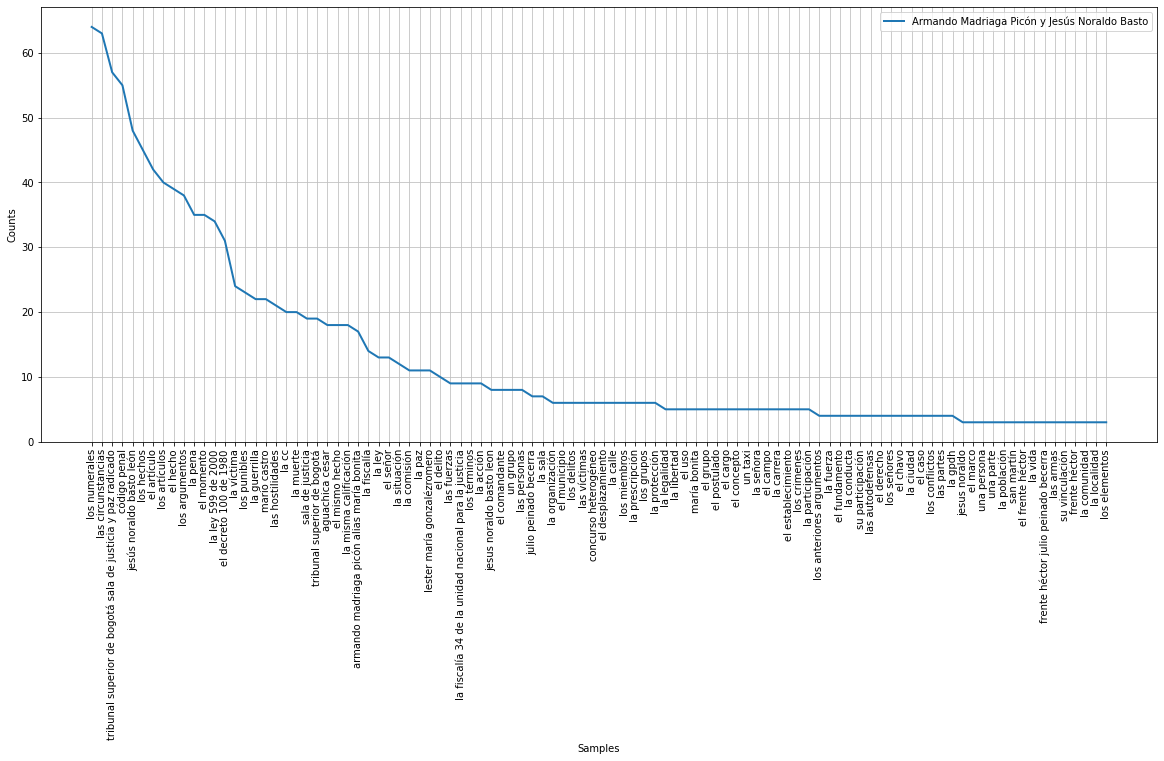

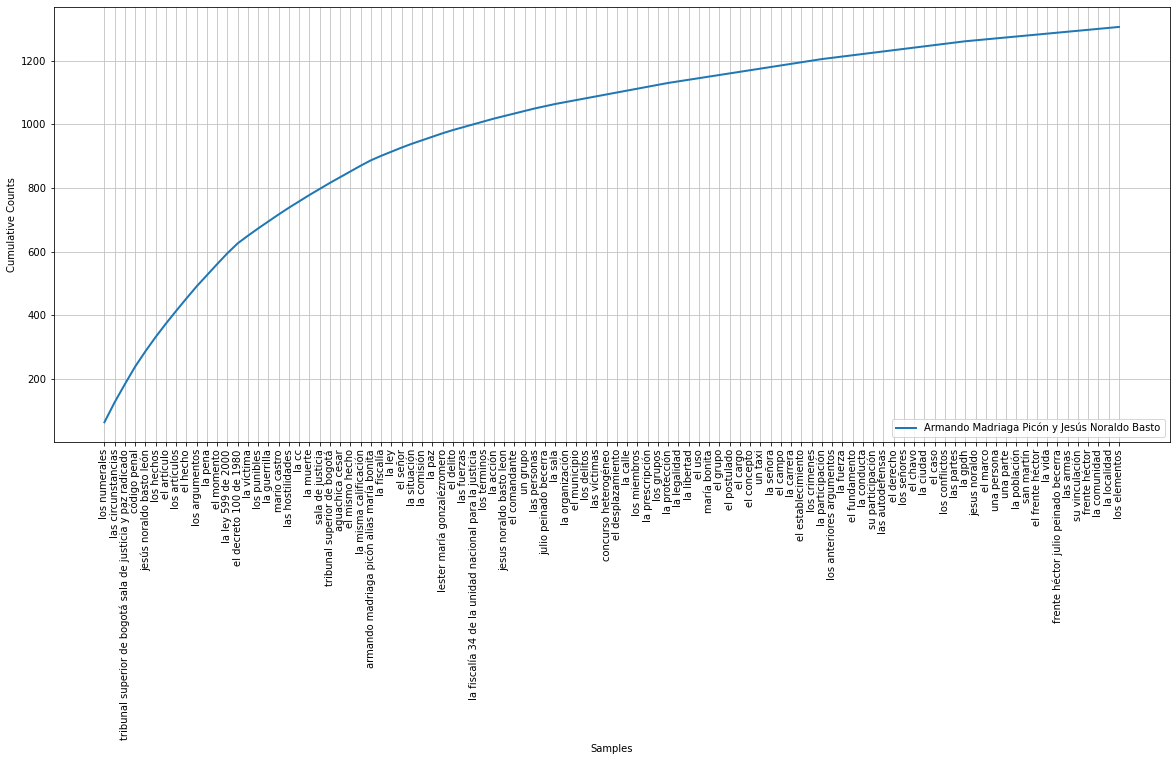

In [50]:
# doc = {'path': single_file, 'file_name': file_name, 'date': date_time_obj, 'year': date_time_obj.year, 'month': date_time_obj.month, 'day': date_time_obj.day, 'num_pages': len(pdf), 'pages_raw': list(pdf),  
#                   'text_raw': "\n\n".join(pdf), 'sentences': [], 'doc_parser': []}
# dict_sent = {'page': count_page, 'local_sent': count_sent_local, 'global_sent': count_sent, 'text_raw': item, 'text_clear': '', 'chunks': [], 'verbs': []}
label_sent = []
label_chunk_sent = {}
label_chunk = []
label_ent_sent = {}
label_ent = []
label_verb_sent = {}
label_verb = []
for item in list_texts_corpus[2:3]:
    label_sent.append(item['file_name'])
    key_name = item['file_name'] #item['file_name'].lower().strip()
    print(key_name)
    label_chunk_sent[key_name] = [item_chunk['text'].lower() for sent in item['sentences'][1550:2100] for item_chunk in sent['chunks']  if len(item_chunk['text'].split(' ')) > 1]
    label_chunk += label_chunk_sent[key_name]
    label_ent_sent[key_name] = [item_ent['text'].lower() for sent in item['sentences'][1550:2100] for item_ent in sent['entities'] ] #if item_ent['type'] == 'PER'
    label_ent += label_ent_sent[key_name]
    label_verb_sent[key_name] = [item_verb['text'].lower() for sent in item['sentences'][1550:2100] for item_verb in sent['entities'] ] #if item_ent['type'] == 'PER'
    label_verb += label_verb_sent[key_name]
print(label_sent) 
print('label_chunk', len(label_chunk), len(set(label_chunk)))
print('label_ent', len(label_ent), len(set(label_ent_sent)))
# print(label_chunk)

from collections import Counter
word_freq = Counter(label_chunk)
common_words = word_freq.most_common(100)
print(common_words)

cfd = nltk.ConditionalFreqDist(
           (title, word)
           for title in label_sent
           for word in label_chunk_sent[title])

label_words = [word for (word, freq) in common_words]
print(label_words)
# cfd.tabulate(conditions=label_sent, samples=label_words)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8)) 
cfd.plot(conditions=label_sent, samples=label_words)
plt.figure(figsize=(20, 8))
cfd.plot(conditions=label_sent, samples=label_words, cumulative=True)


[('tribunal superior de bogotá sala de justicia', 57), ('postulados armando madriaga picón', 57), ('jesús noraldo basto león', 54), ('código penal', 54), ('decreto 100', 44), ('la ley', 40), ('maría bonita', 34), ('audiencia', 33), ('armando madriaga picón', 32), ('aguachica', 25), ('mario castro', 22), ('aguachica cesar', 19), ('tribunal superior de bogotá', 19), ('dra', 18), ('lester maría gonzalézromero', 18), ('juan francisco prada', 16), ('homicidio', 14), ('sala de justicia y paz', 13), ('fiscalía', 12), ('leon', 11), ('jesus', 11), ('frente héctor julio peinado becerra', 11), ('rancho', 8), ('rubiano', 8), ('picon', 7), ('chorola', 7), ('fiscalía 34 de la unidad nacional para la justicia y la paz', 6), ('identificado', 6), ('caliche', 5), ('armando', 4), ('unidad nacional para la justicia y la paz', 4), ('el chavo', 4), ('chavo', 4), ('derecho internacional humanitario', 4), ('la sala', 4), ('jesus noraldo', 3), ('utilización', 3), ('basto leon', 3), ('alfredo ballena', 3), ('sa

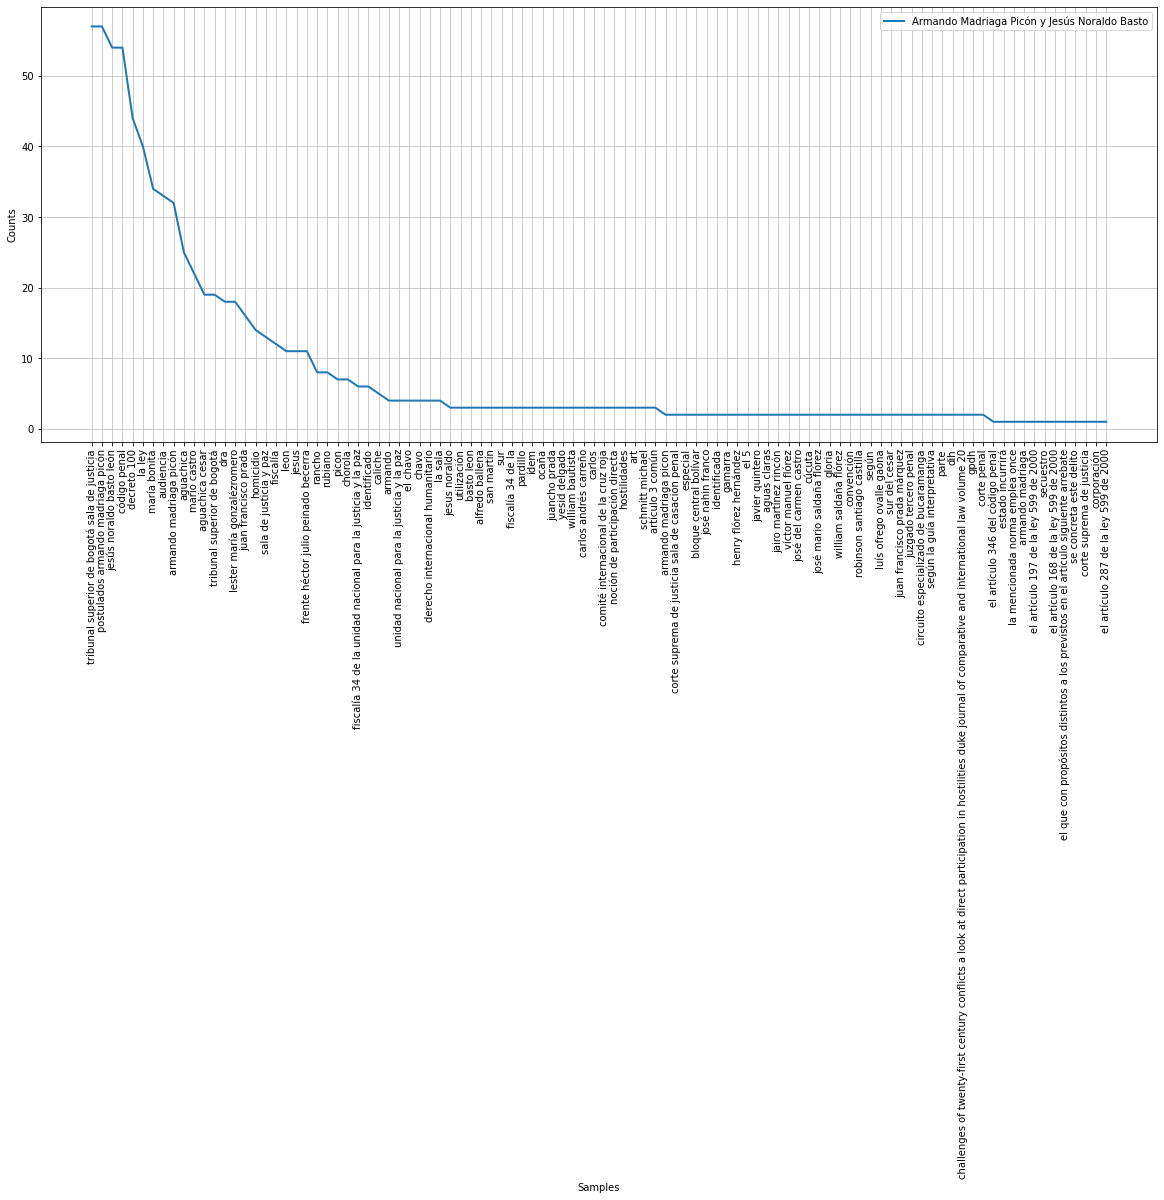

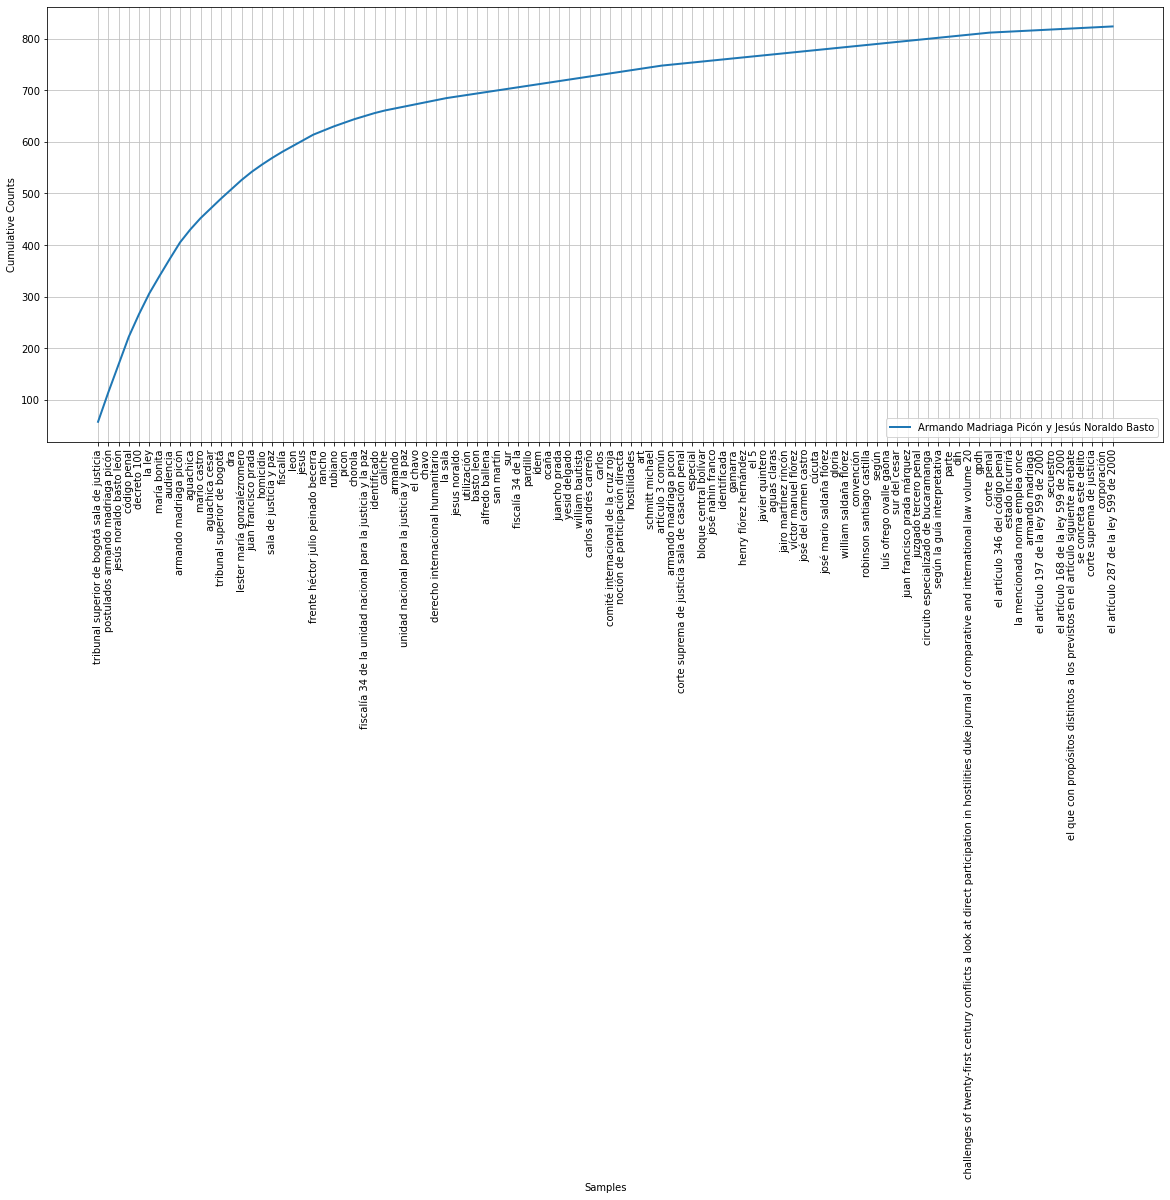

In [51]:
from collections import Counter
word_freq = Counter(label_ent)
common_words = word_freq.most_common(100)
print(common_words)

cfd = nltk.ConditionalFreqDist(
           (title, word)
           for title in label_sent
           for word in label_ent_sent[title])

label_words = [word for (word, freq) in common_words]
print(label_words)

# cfd.tabulate(conditions=label_sent, samples=label_words)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8)) 
cfd.plot(conditions=label_sent, samples=label_words)
plt.figure(figsize=(20, 8))
cfd.plot(conditions=label_sent, samples=label_words, cumulative=True)


In [59]:
from collections import Counter
word_freq = Counter(label_verb)
common_words = word_freq.most_common(100)
print(common_words)

cfd = nltk.ConditionalFreqDist(
           (title, word)
           for title in label_sent
           for word in label_verb_sent[title])

label_words = [word for (word, freq) in common_words]
print(label_words)

# cfd.tabulate(conditions=label_sent, samples=label_words)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8)) 
cfd.plot(conditions=label_sent, samples=label_words)
plt.figure(figsize=(20, 8))
cfd.plot(conditions=label_sent, samples=label_words, cumulative=True)

[]


KeyError: 'Armando Madriaga Picón y Jesús Noraldo Basto'

In [52]:
# label_sent = []
# label_chunk_sent = {}
# label_chunk = []
import numpy as np
import pandas as pd

my_array = np.array([[item, sent_name] for sent_name in label_ent_sent for item in label_ent_sent[sent_name]] , dtype=object)

data = pd.DataFrame(my_array, columns = ['label', 'sent'])

print(data)
print(type(data))
print(data.dtypes)

                                                label  \
0        tribunal superior de bogotá sala de justicia   
1                   postulados armando madriaga picón   
2                            jesús noraldo basto león   
3                                            fiscalía   
4                              armando madriaga picon   
...                                               ...   
1227                       robinson santiago castilla   
1228                                               no   
1229                                      sijin desan   
1230                                           no 865   
1231  estación de polícia de la localidad de engativa   

                                              sent  
0     Armando Madriaga Picón y Jesús Noraldo Basto  
1     Armando Madriaga Picón y Jesús Noraldo Basto  
2     Armando Madriaga Picón y Jesús Noraldo Basto  
3     Armando Madriaga Picón y Jesús Noraldo Basto  
4     Armando Madriaga Picón y Jesús Noraldo Basto

In [53]:
print(data.nunique())
print(data['label'].value_counts().sort_index())
values = data[['label', 'sent']]

label    508
sent       1
dtype: int64
1 n a no 29h-26 del municipio de aguachica cesar    1
12 de agosto 1949                                   1
306 sala de justicia y paz                          1
332 sala de justicia y paz                          1
339 sala de justicia y paz                          1
                                                   ..
wilson solis sierra                                 1
yamaha de placa gkq-77                              1
yesid delgado                                       3
él                                                  1
ídem                                                3
Name: label, Length: 508, dtype: int64


In [54]:
sorted_values = values['label'].sort_values().unique()

from dirty_cat import SimilarityEncoder

similarity_encoder = SimilarityEncoder(similarity='ngram')
transformed_values = similarity_encoder.fit_transform(
    sorted_values.reshape(-1, 1))

In [55]:
from sklearn.manifold import MDS

mds = MDS(dissimilarity='precomputed', n_init=10, random_state=42)
two_dim_data = mds.fit_transform(
    1 - transformed_values)  # transformed values lie
# in the 0-1 range, so 1-transformed_value yields a positive dissimilarity matrix
print(two_dim_data.shape)
print(sorted_values.shape)

(508, 2)
(508,)


In [56]:
import numpy as np

n_points = 50
np.random.seed(42)
from sklearn.neighbors import NearestNeighbors

random_points = np.random.choice(len(similarity_encoder.categories_[0]),n_points, replace=False)
nn = NearestNeighbors(n_neighbors=2).fit(transformed_values)
_, indices_ = nn.kneighbors(transformed_values[random_points])
indices = np.unique(indices_.squeeze())

Text(0.5, 1.0, 'multi-dimensional-scaling representation using a 3gram similarity matrix')

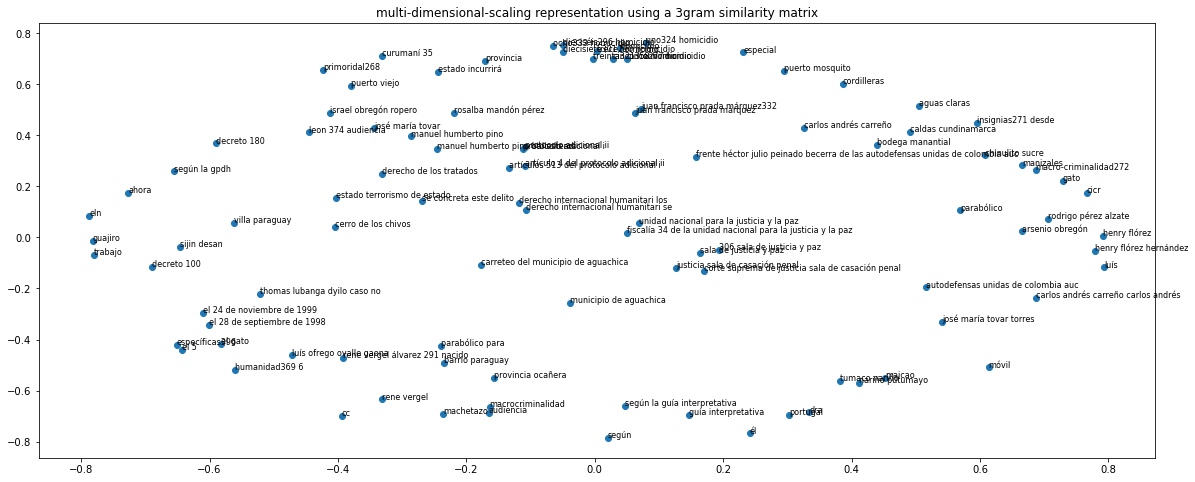

In [57]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 8)) 
f, ax = plt.subplots(figsize=(20, 8))
ax.scatter(x=two_dim_data[indices, 0], y=two_dim_data[indices, 1])
# adding the legend
for x in indices:
    ax.text(x=two_dim_data[x, 0], y=two_dim_data[x, 1], s=sorted_values[x],
            fontsize=8)
ax.set_title('multi-dimensional-scaling representation using a 3gram similarity matrix')

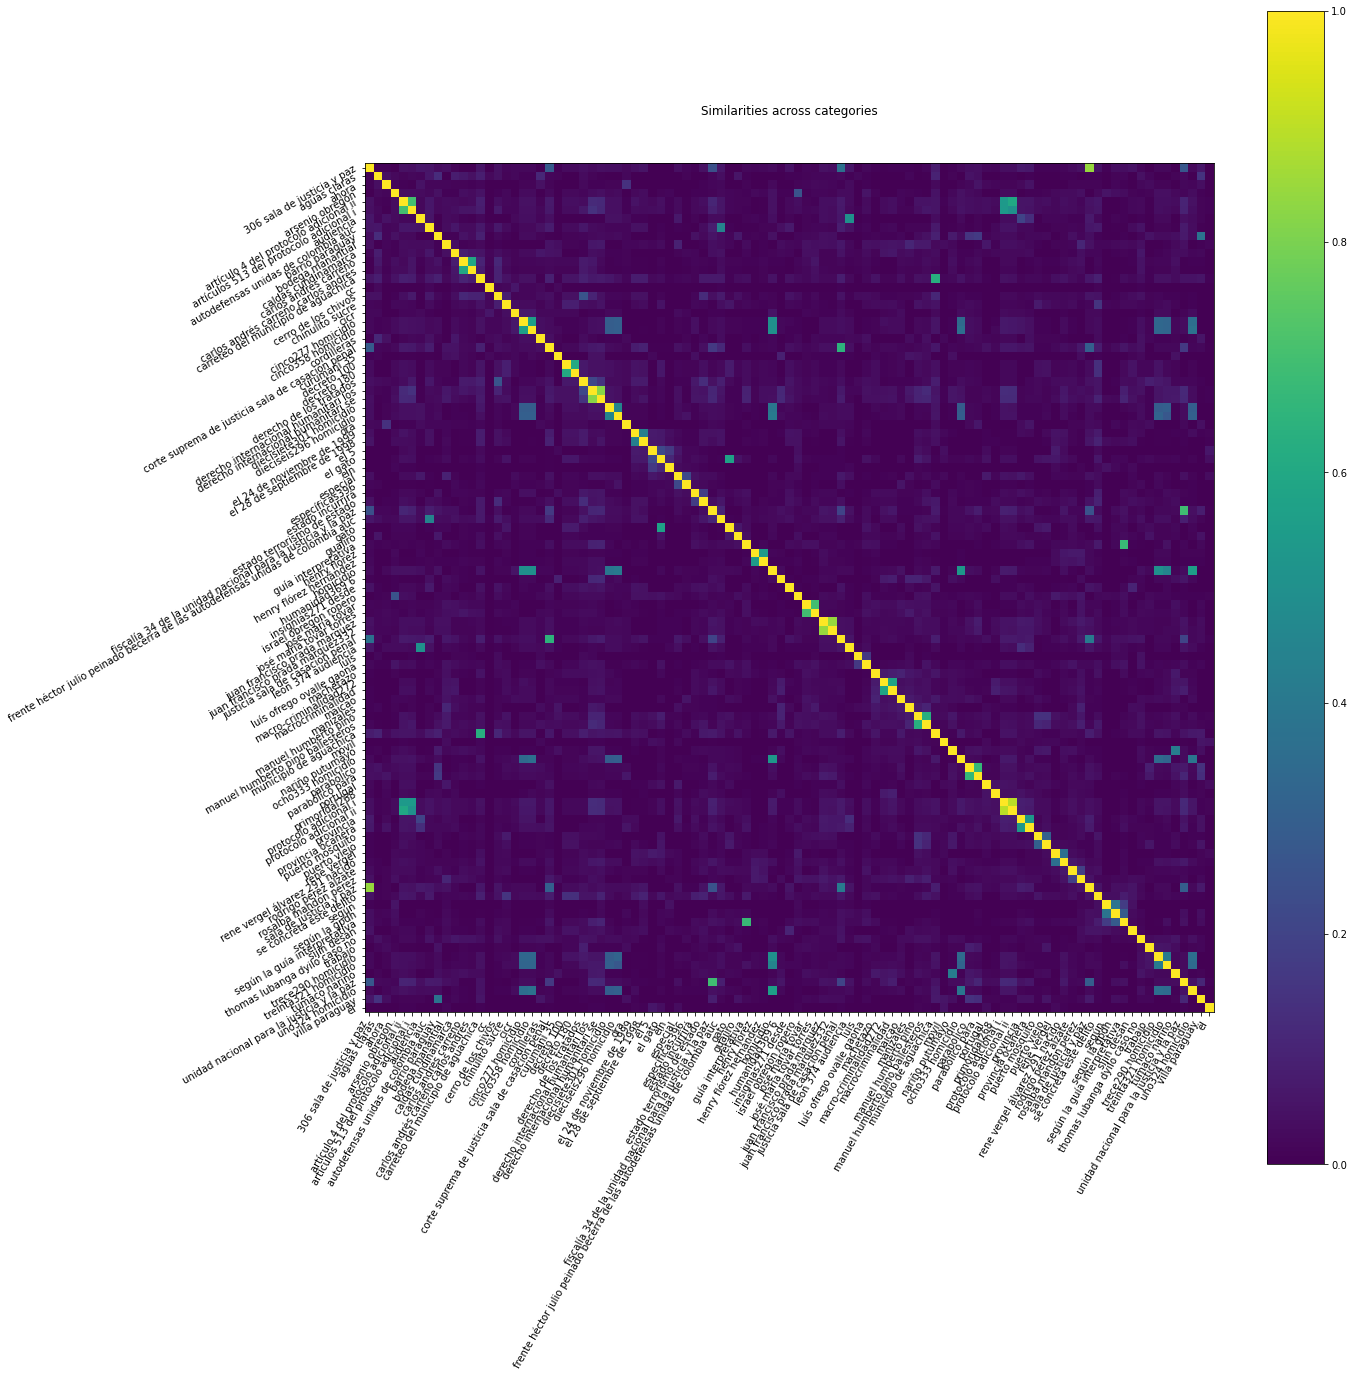

In [58]:
f2, ax2 = plt.subplots(figsize=(20, 20))
cax2 = ax2.matshow(transformed_values[indices, :][:, indices])
ax2.set_yticks(np.arange(len(indices)))
ax2.set_xticks(np.arange(len(indices)))
ax2.set_yticklabels(sorted_values[indices], rotation='30')
ax2.set_xticklabels(sorted_values[indices], rotation='60', ha='right')
ax2.xaxis.tick_bottom()
ax2.set_title('Similarities across categories')
f2.colorbar(cax2)
f2.tight_layout()